<a href="https://colab.research.google.com/github/Wayne401-afk/ECG-CNN/blob/main/CnnEcgCalsif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8250 - loss: 0.7430 - val_accuracy: 0.8830 - val_loss: 0.3836
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8862 - loss: 0.4084 - val_accuracy: 0.9121 - val_loss: 0.3283
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9049 - loss: 0.3399 - val_accuracy: 0.9229 - val_loss: 0.2710
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9071 - loss: 0.3202 - val_accuracy: 0.9249 - val_loss: 0.2611
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9182 - loss: 0.2877 - val_accuracy: 0.9352 - val_loss: 0.2337
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9231 - loss: 0.2765 - val_accuracy: 0.9358 - val_loss: 0.2198
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9292 - loss: 0.2559 - val_accuracy: 0.9378 - val_loss: 0.2035
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9310 - loss: 0.2369 - val_accuracy: 0.

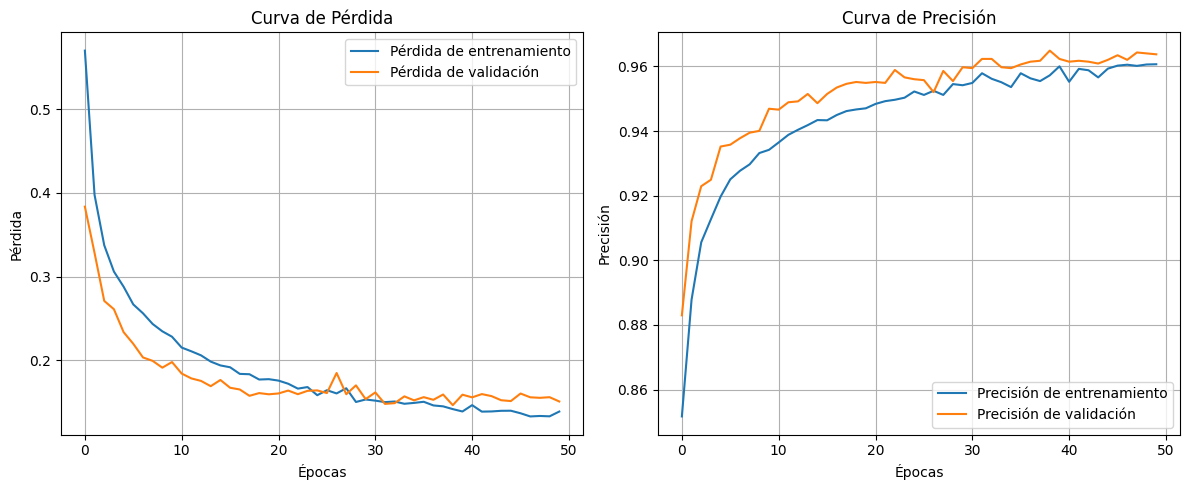

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


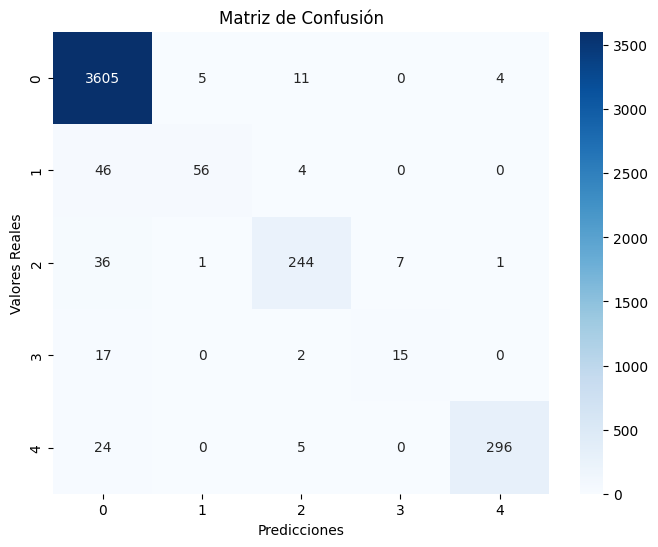

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3625
         1.0       0.90      0.53      0.67       106
         2.0       0.92      0.84      0.88       289
         3.0       0.68      0.44      0.54        34
         4.0       0.98      0.91      0.95       325

    accuracy                           0.96      4379
   macro avg       0.89      0.74      0.80      4379
weighted avg       0.96      0.96      0.96      4379



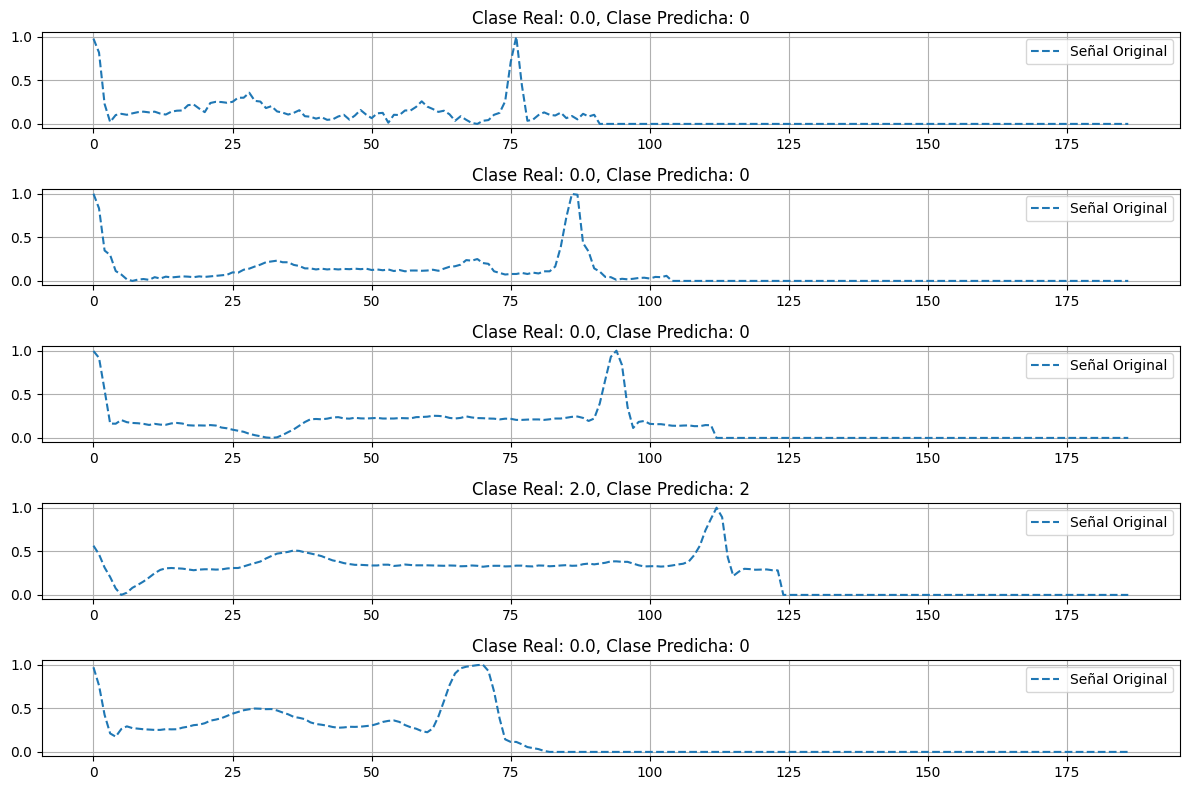

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ----- Cargar datos desde archivo CSV -----
data = pd.read_csv("/content/mitbih_test.csv")

# Separar características (X) y etiquetas (y)
X = data.iloc[:, :-1].values  # Todas las columnas excepto la última
y = data.iloc[:, -1].values   # Última columna

# Normalizar las características (opcional)
X = (X - np.min(X)) / (np.max(X) - np.min(X))

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir etiquetas a formato one-hot
num_classes = len(np.unique(y))
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# ----- Modelo de Clasificación -----
input_dim = X.shape[1]

# Modelo supervisado simple
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Graficar la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# ----- Evaluación del Modelo -----
# Predecir en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

# Reporte de Clasificación
print("Classification Report:\n", classification_report(y_test, y_pred))

# Graficar ejemplos de señales originales vs predicciones
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.plot(X_test[i], label='Señal Original', linestyle='--')
    plt.title(f'Clase Real: {y_test[i]}, Clase Predicha: {y_pred[i]}')
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()
